# Implementando DBSCAN

In [1]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [2]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True) # generamos los datos con make_blobs

df = pd.DataFrame( # creamos un dataframe con los datos
    {
        "x1": X[:, 0],
        "x2": X[:, 1]
    }
)

df_c = pd.DataFrame( # creamos un dataframe con los centros
    {
        "x1": c[:, 0],
        "x2": c[:, 1]
    }
)

In [3]:
# Generamos los datos con make_moons
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_m = pd.DataFrame( # creamos un dataframe con los datos
    {
        "x1": X_m[:, 0],
        "x2": X_m[:, 1]
    }
)

## Visualizando datos

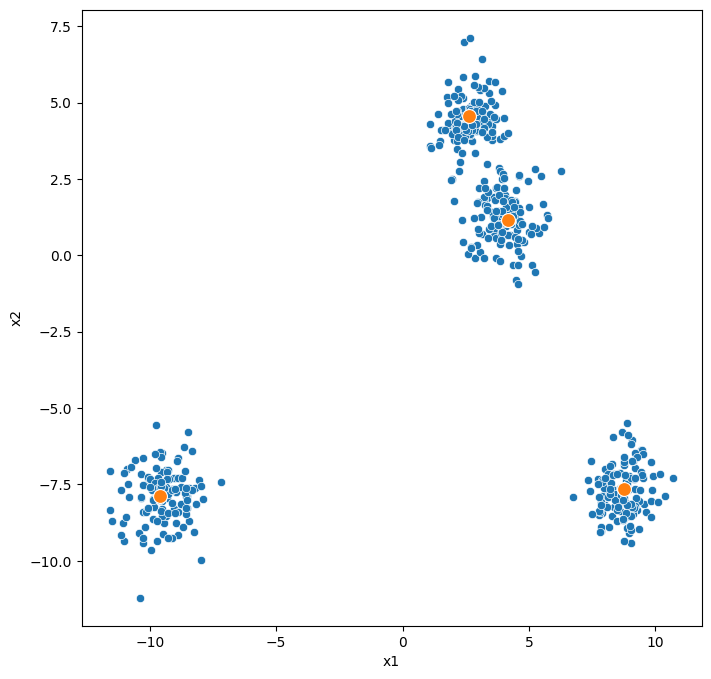

In [4]:
# Visualizamos los datos de los blobs
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="x1", y="x2")
sns.scatterplot(data=df_c, x="x1", y="x2", markers='X', s=100);

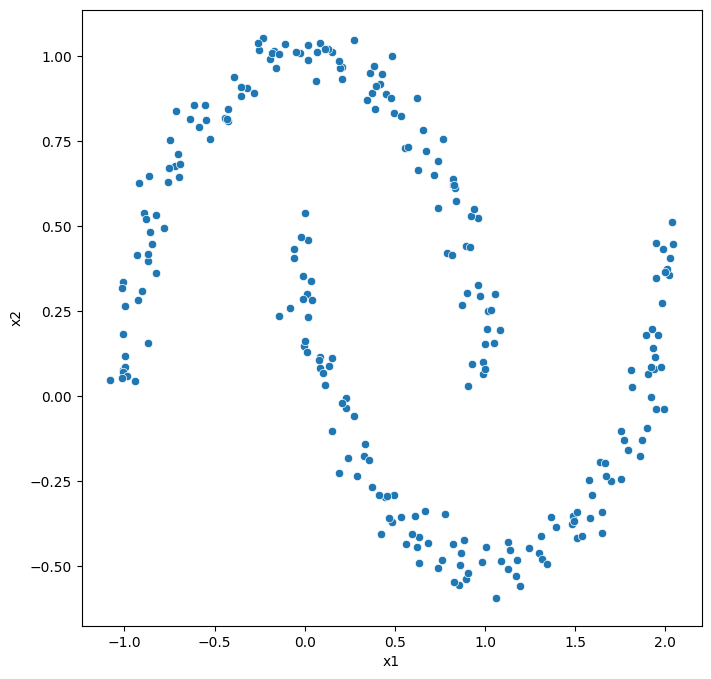

In [5]:
# Visualizamos los datos de las moons
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_m, x="x1", y="x2");

## Implementando DBSCAN

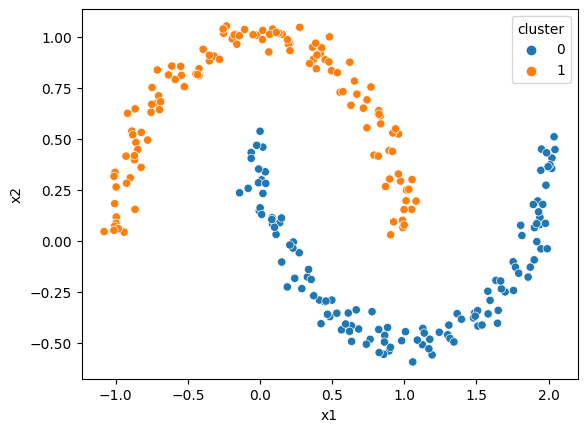

In [7]:
# creamos el modelo
dbscan = DBSCAN(eps=0.3, min_samples=3)
# realizamos el entrenamiento y la predicción
y_m_pred = dbscan.fit_predict(X_m)
# Agregamos el resultado a nuestro dataframe
df_m["cluster"] = y_m_pred
# Visualizamos los datos
sns.scatterplot(data=df_m, x="x1", y="x2", hue="cluster");

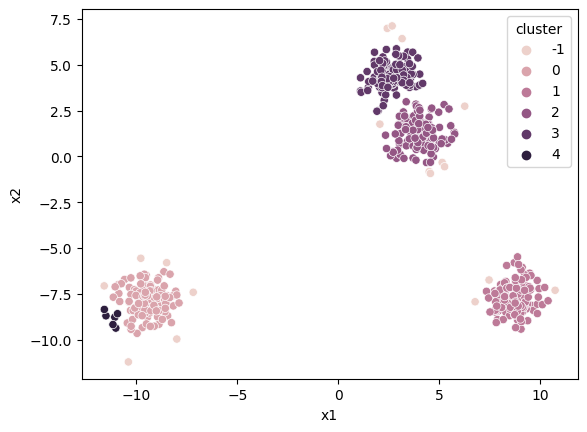

In [9]:
# Utilizamos blobs
dbscan_cluster = DBSCAN(eps=0.5, min_samples=3)
y_pred = dbscan_cluster.fit_predict(X)
df["cluster"] = y_pred
sns.scatterplot(data=df, x="x1", y="x2", hue="cluster");

# Encontrar híper-parámetros

In [11]:
from sklearn.neighbors import NearestNeighbors # Nos permite calcular los vecinos más cercanos

neighbors = NearestNeighbors(n_neighbors=3) # Creamos el modelo
neighbors_fit = neighbors.fit(X) # Realizamos el entrenamiento
distances, indices = neighbors_fit.kneighbors(X) # Obtenemos los índices de los vecinos más cercanos
distances = np.sort(distances, axis=0) # Ordenamos los datos de menor a mayor
distances = distances[:, 1] # Obtenemos los datos de la segunda columna

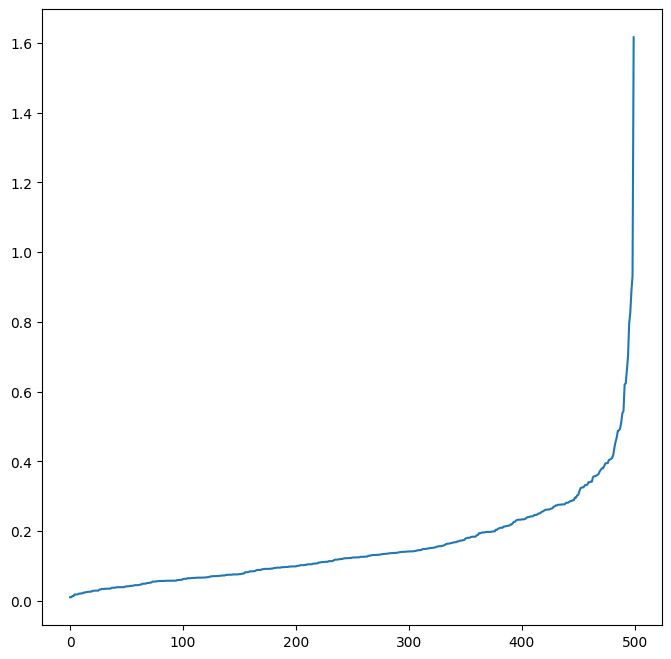

In [12]:
# Graficamos la distancia de los vecinos más cercanos
plt.figure(figsize=(8, 8))
plt.plot(distances);

In [14]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2, 10)
from itertools import product # Nos permite realizar el producto cartesiano

# Creamos una lista con los valores de eps y min_samples
parameters = list(product(eps_values, min_samples))

# creamos una lista para los coeficientes de silueta
sil_scores = []

# iteramos sobre los parámetros
for p in parameters:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X, y_pred))

In [17]:
df_params_tuning = pd.DataFrame.from_records(parameters, columns=["Eps", "Min_samples"]) # creamos un dataframe con los parámetros
df_params_tuning["silhouette_score"] = sil_scores # agregamos los coeficientes de silueta

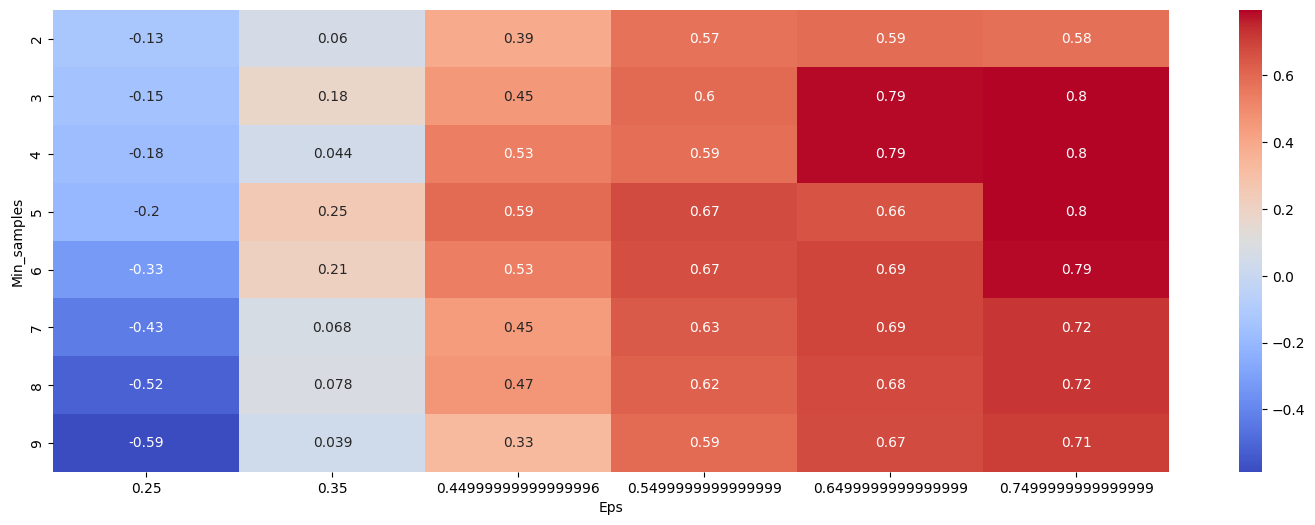

In [19]:
pivot_data = pd.pivot_table(df_params_tuning, values="silhouette_score", index="Min_samples", columns="Eps") # creamos un pivot table

# Graficamos el pivot table
fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax);

> Las partes mas rojas indican que hay un mejor desempeño en el modelo y podemos utilizar los valores en DBSCAN

# Evaluando resultados de DBSCAN

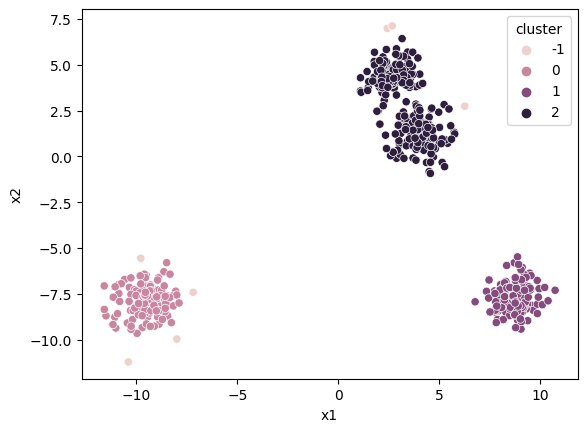

In [20]:
# ejecutamos DBSCAN con los mejores parámetros
dbscan_cluster_obtained = DBSCAN(eps=0.75, min_samples=3)
y_pred = dbscan_cluster_obtained.fit_predict(X)
df["cluster"] = y_pred
sns.scatterplot(data=df, x="x1", y="x2", hue="cluster");

## Evaluamos el coeficiente de silueta

For n_clusters = 4 The average silhouette_score is : 0.7966453351349713


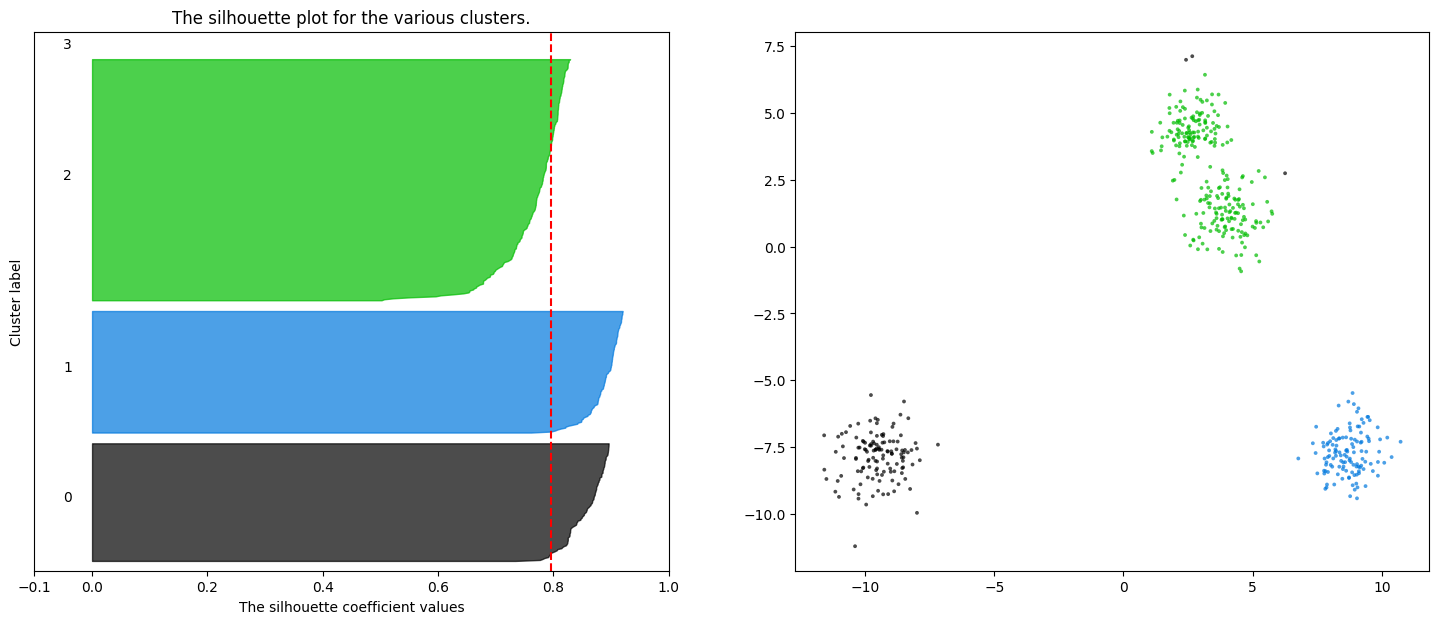

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.75, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()